# Importação de bibliotecas

In [1]:
import numpy as np
import timeit
import warnings
warnings.filterwarnings('ignore')
import os
import sys
from src.estrategias.genetic.genetic_task import *
from src.estrategias.forca_bruta.brute_force_branch_no_bound import *
from src.estrategias.branchbound.branchbound import *
import pandas as pd


7


In [2]:
class AvaliacaoAlgoritmo:
    """
    Classe para registrar o resultado das execuções de um algoritmo
    """

    def __init__(self,quantidade_repeticoes,lista_parametros):
        self.quantidade_repeticoes = quantidade_repeticoes
        self.lista_parametros = lista_parametros
    def retorna_resultados(self,funcao,nome_algoritmo):
        data=[]
        for parametro in self.lista_parametros:
            for i in range(self.quantidade_repeticoes):
                f = open(os.devnull, 'w')
                antigo = sys.stdout
                sys.stdout = f
                starttime = timeit.default_timer()
                funcao(*parametro)
                interval =  timeit.default_timer() - starttime
                sys.stdout = antigo
                data.append([nome_algoritmo,parametro,interval])
        retorno = pd.DataFrame(data=data,columns=['algoritmo','parametro','tempo'])
        return retorno
def gera_parametro(complexidade):
    """
    Função para gerar parâmetros de acordo com a complexidade ie quantidade de caracteres
    A desenvolver
    :param complexidade:
    :return:
    """
    if complexidade==4:
        return ('abcd','dba')
    elif complexidade==7:
        return ('abacaxi','ixcaba')



# Descrição do problema

# Abordagem Força Bruta

In [3]:
str1,str2 = gera_parametro(4)
avaliacao = AvaliacaoAlgoritmo(30,[(str1,str2)])
df_forca_bruta = avaliacao.retorna_resultados(roda_brute,'Força Bruta')

In [4]:
df_forca_bruta.head()

,algoritmo,parametro,tempo
0,Força Bruta,"(abcd, dba)",41.106931
1,Força Bruta,"(abcd, dba)",39.498254
2,Força Bruta,"(abcd, dba)",43.737293
3,Força Bruta,"(abcd, dba)",45.808768
4,Força Bruta,"(abcd, dba)",44.890865


<AxesSubplot:>

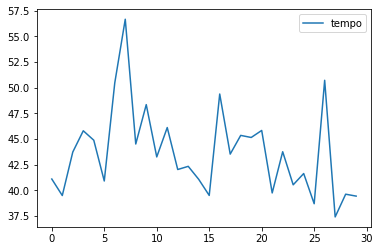

In [5]:
df_forca_bruta[['tempo']].plot()

In [6]:
df_forca_bruta.to_csv('resultados_forca_bruta.csv')

# Abordagem Branch and Bound

In [11]:
df_branch = avaliacao.retorna_resultados(roda_branch,'Branch and Bound')

In [12]:
df_branch.head()

,algoritmo,parametro,tempo
0,Branch and Bound,"(abcd, dba)",0.228120
1,Branch and Bound,"(abcd, dba)",0.319270
2,Branch and Bound,"(abcd, dba)",0.207390
3,Branch and Bound,"(abcd, dba)",0.188146
4,Branch and Bound,"(abcd, dba)",0.194379


<AxesSubplot:>

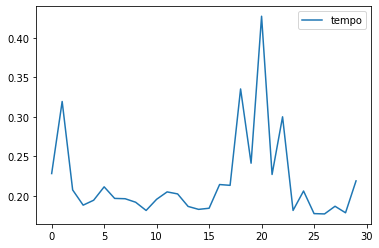

In [13]:
df_branch[['tempo']].plot()

In [14]:
df_branch.to_csv('resultados_brach_and_bound.csv')

# Abordagem de algoritmos genéticos (Metaheurística)

In [15]:
df_genetic = avaliacao.retorna_resultados(roda_genetic,'Genetic Algorithm')

In [16]:
df_genetic.head()

,algoritmo,parametro,tempo
0,Genetic Algorithm,"(abcd, dba)",3.054211
1,Genetic Algorithm,"(abcd, dba)",3.708520
2,Genetic Algorithm,"(abcd, dba)",3.240551
3,Genetic Algorithm,"(abcd, dba)",2.900255
4,Genetic Algorithm,"(abcd, dba)",3.361122


<AxesSubplot:>

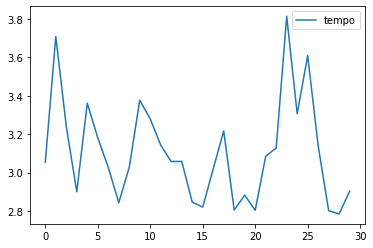

In [17]:
df_genetic[['tempo']].plot()

In [18]:
df_genetic.to_csv('resultados_genetic.csv')